**QUESTION 2**

**i21-2682**

**A-3**

**Displaying the images Using mtplotlib**

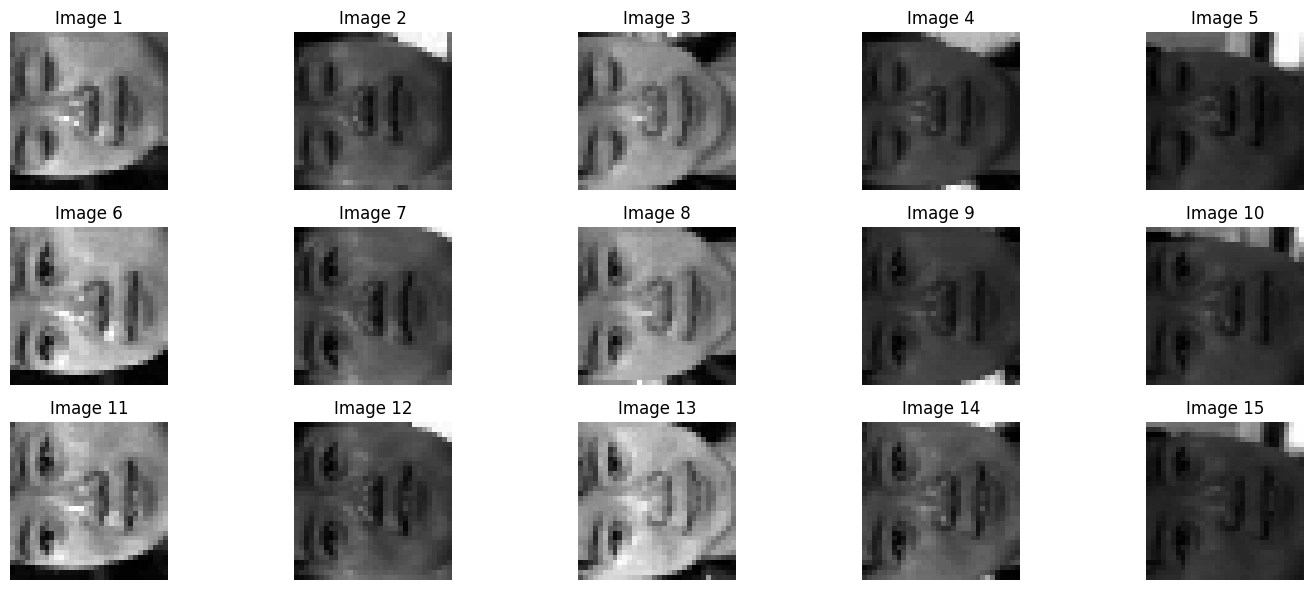

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


dataset = pd.read_csv('dataset.csv', header=None)

# Reshape each row into a 32x32 image
images = dataset.values.reshape(-1, 32, 32)

# Display the images using 3,5
fig, axes = plt.subplots(3, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()


**Pre-Process the dataset**
**Selecting the training and testing**

Pre-processed the dataset by normalizing each face image vector to unit
length. Next, for each of the 10 subjects, randomly select 150 images for training and use the remaining 20 for testing.

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split



# Normalize each face image vector to unit length
images_normalized = images / np.linalg.norm(images, axis=1, keepdims=True)

# Split the dataset into training and testing sets for each subject
train_images = []
test_images = []
for i in range(10):
    indices = np.arange(i * 170, (i + 1) * 170)
    train_idx, test_idx = train_test_split(indices, train_size=150, test_size=20, random_state=42)
    train_images.extend(images_normalized[train_idx])
    test_images.extend(images_normalized[test_idx])

train_images = np.array(train_images)
test_images = np.array(test_images)

print("Shape of training images array:", train_images.shape)
print("Shape of testing images array:", test_images.shape)


Shape of training images array: (1500, 32, 32)
Shape of testing images array: (200, 32, 32)


**Applied KNN**

In [33]:
import numpy as np
import pandas as pd

# Load dataset
data = pd.read_csv("dataset.csv", header=None)

# Normalizing each face image vector to unit length
def normalize_vector(vector):
    return vector / np.linalg.norm(vector)

normalized_data = data.apply(lambda x: normalize_vector(x), axis=1)

# Split dataset into training and testing sets for each subject
train_data = []
test_data = []

num_images_per_subject = 170
num_training_samples = 150
num_testing_samples = 20

for subject in range(10):
    subject_data = normalized_data.iloc[subject * num_images_per_subject: (subject + 1) * num_images_per_subject]
    train_indices = np.random.choice(subject_data.index, num_training_samples, replace=False)
    test_indices = subject_data.drop(train_indices).index

    train_data.extend(subject_data.loc[train_indices].values)
    test_data.extend(subject_data.loc[test_indices].values)

train_data = np.array(train_data)
test_data = np.array(test_data)

# Implement k-NN classifier
def euclidean_distance(instance1, instance2):
    return np.linalg.norm(instance1 - instance2)

def k_nearest_neighbors(train_data, train_labels, test_instance, k):
    distances = [euclidean_distance(test_instance, train_instance) for train_instance in train_data]
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = train_labels[nearest_indices]
    unique_labels, label_counts = np.unique(nearest_labels, return_counts=True)
    predicted_label = unique_labels[np.argmax(label_counts)]
    return predicted_label

# Evaluate the k-NN classifier
train_labels = np.repeat(np.arange(10), num_training_samples)
test_labels = np.repeat(np.arange(10), num_testing_samples)

k_values = [2,5, 7, 11]  # Try different values of k
for k in k_values:
    correct_predictions = 0
    for i, test_instance in enumerate(test_data):
        predicted_label = k_nearest_neighbors(train_data, train_labels, test_instance, k)
        if predicted_label == test_labels[i]:
            correct_predictions += 1
    accuracy = correct_predictions / len(test_data)
    print(f"k-NN Classifier (k={k}) Accuracy: {accuracy:.2f}")


k-NN Classifier (k=2) Accuracy: 0.97
k-NN Classifier (k=5) Accuracy: 0.95
k-NN Classifier (k=7) Accuracy: 0.94
k-NN Classifier (k=11) Accuracy: 0.94


**Implemented Euclidean and cosine similarity distance
measures and used them for different values of K.**

In [9]:
import numpy as np
import pandas as pd

# Load dataset
data = pd.read_csv("dataset.csv", header=None)

# Normalizing each face image vector to unit length
def normalize_vector(vector):
    return vector / np.linalg.norm(vector)

normalized_data = data.apply(lambda x: normalize_vector(x), axis=1)

# Split dataset into training and testing sets for each subject
def split_dataset(subject_data, num_training_samples, num_testing_samples):
    train_indices = np.random.choice(subject_data.index, num_training_samples, replace=False)
    test_indices = subject_data.drop(train_indices).index
    return subject_data.loc[train_indices].values, subject_data.loc[test_indices].values

num_images_per_subject = 170
num_training_samples = 100  # Adjust the number of training samples per subject
num_testing_samples = 70   # Adjust the number of testing samples per subject

train_data = []
test_data = []

for subject in range(10):
    subject_data = normalized_data.iloc[subject * num_images_per_subject: (subject + 1) * num_images_per_subject]
    train_set, test_set = split_dataset(subject_data, num_training_samples, num_testing_samples)
    train_data.extend(train_set)
    test_data.extend(test_set)

train_data = np.array(train_data)
test_data = np.array(test_data)

# Implement k-NN classifier
def euclidean_distance(instance1, instance2):
    return np.linalg.norm(instance1 - instance2)

def cosine_similarity(instance1, instance2):
    dot_product = np.dot(instance1, instance2)
    magnitude1 = np.linalg.norm(instance1)
    magnitude2 = np.linalg.norm(instance2)
    return dot_product / (magnitude1 * magnitude2)

def k_nearest_neighbors(train_data, train_labels, test_instance, k, distance_metric):
    if distance_metric == 'euclidean':
        distances = [euclidean_distance(test_instance, train_instance) for train_instance in train_data]
    elif distance_metric == 'cosine':
        distances = [cosine_similarity(test_instance, train_instance) for train_instance in train_data]
    else:
        raise ValueError("Invalid distance metric. Choose 'euclidean' or 'cosine'.")
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = train_labels[nearest_indices]
    unique_labels, label_counts = np.unique(nearest_labels, return_counts=True)
    predicted_label = unique_labels[np.argmax(label_counts)]
    return predicted_label

# Evaluate the k-NN classifier
train_labels = np.repeat(np.arange(10), num_training_samples)
test_labels = np.repeat(np.arange(10), num_testing_samples)

distance_metrics = ['euclidean', 'cosine']
k_values = [2, 5, 7, 11]

for distance_metric in distance_metrics:
    print(f"Results for {distance_metric.capitalize()} Distance:")
    for k in k_values:
        correct_predictions = 0
        for i, test_instance in enumerate(test_data):
            predicted_label = k_nearest_neighbors(train_data, train_labels, test_instance, k, distance_metric)
            if predicted_label == test_labels[i]:
                correct_predictions += 1
        accuracy = correct_predictions / len(test_data)
        print(f"k-NN Classifier (k={k}) Accuracy: {accuracy:.2f}")
    print()


Results for Euclidean Distance:
k-NN Classifier (k=2) Accuracy: 0.96
k-NN Classifier (k=5) Accuracy: 0.94
k-NN Classifier (k=7) Accuracy: 0.91
k-NN Classifier (k=11) Accuracy: 0.90

Results for Cosine Distance:
k-NN Classifier (k=2) Accuracy: 0.06
k-NN Classifier (k=5) Accuracy: 0.06
k-NN Classifier (k=7) Accuracy: 0.05
k-NN Classifier (k=11) Accuracy: 0.06



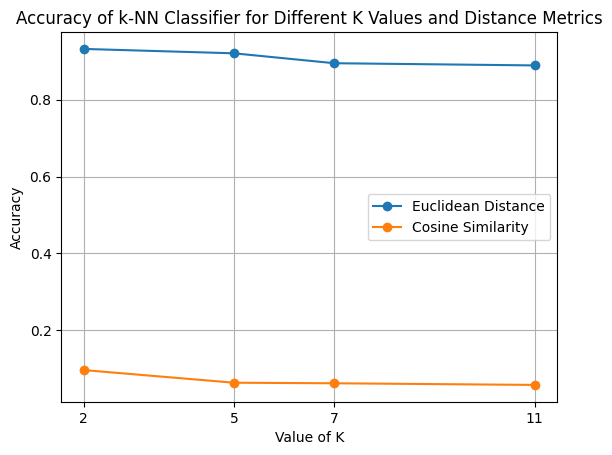

In [6]:
import matplotlib.pyplot as plt

# Initialize lists to store accuracies for each distance metric
euclidean_accuracies = []
cosine_accuracies = []

for distance_metric in distance_metrics:
    accuracies = []
    for k in k_values:
        correct_predictions = 0
        for i, test_instance in enumerate(test_data):
            predicted_label = k_nearest_neighbors(train_data, train_labels, test_instance, k, distance_metric)
            if predicted_label == test_labels[i]:
                correct_predictions += 1
        accuracy = correct_predictions / len(test_data)
        accuracies.append(accuracy)

    if distance_metric == 'euclidean':
        euclidean_accuracies = accuracies
    else:
        cosine_accuracies = accuracies

# Plotting
plt.plot(k_values, euclidean_accuracies, label='Euclidean Distance', marker='o')
plt.plot(k_values, cosine_accuracies, label='Cosine Similarity', marker='o')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.title('Accuracy of k-NN Classifier for Different K Values and Distance Metrics')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()


**SVM and GaussianNB and KNN accuracy**

*   SVM: Hyperplane-based classifier that maximizes margin between classes; effective in high-dimensional spaces; handles linear and non-linear boundaries.

*   GaussianNB: Probabilistic classifier based on Bayes' theorem with feature independence assumption; suitable for Gaussian-distributed features; computationally efficient.



In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# Load dataset
data = pd.read_csv("dataset.csv", header=None)

# Normalizing each face image vector to unit length
def normalize_vector(vector):
    return vector / np.linalg.norm(vector)

normalized_data = data.apply(lambda x: normalize_vector(x), axis=1)

# Split dataset into features (X) and labels (y)
X = normalized_data.values
y = np.repeat(np.arange(10), 170)  # Labels for each subject

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and evaluate SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
svm_accuracy = svm_classifier.score(X_test, y_test)

# Train and evaluate GaussianNB classifier
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)
gnb_accuracy = gnb_classifier.score(X_test, y_test)

# Define k-Nearest Neighbors classifier
class KNNClassifier:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = []
        for test_instance in X_test:
            distances = [np.linalg.norm(test_instance - train_instance) for train_instance in self.X_train]
            nearest_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.y_train[nearest_indices]
            unique_labels, label_counts = np.unique(nearest_labels, return_counts=True)
            predicted_label = unique_labels[np.argmax(label_counts)]
            y_pred.append(predicted_label)
        return np.array(y_pred)

# Train and evaluate k-NN classifier
knn_classifier = KNNClassifier(k=5)
knn_classifier.fit(X_train, y_train)
knn_accuracy = np.mean(knn_classifier.predict(X_test) == y_test)

# Compare accuracies
print("Accuracy of SVM Classifier:", svm_accuracy)
print("Accuracy of GaussianNB Classifier:", gnb_accuracy)
print("Accuracy of k-NN Classifier:", knn_accuracy)


Accuracy of SVM Classifier: 0.9764705882352941
Accuracy of GaussianNB Classifier: 0.7568627450980392
Accuracy of k-NN Classifier: 0.9607843137254902


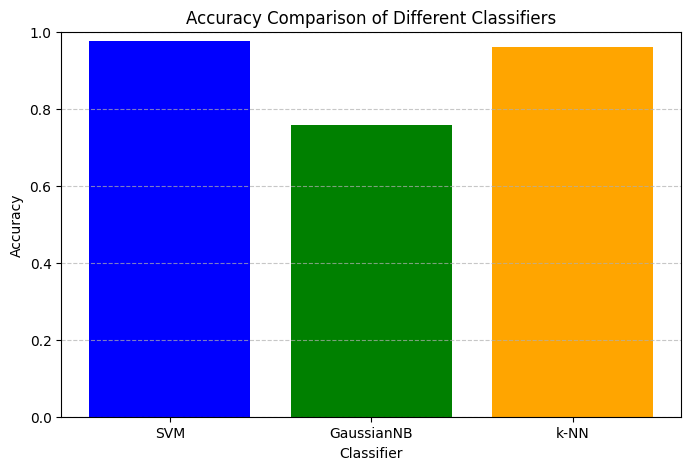

In [9]:
import matplotlib.pyplot as plt

# Calculate accuracies
accuracies = [svm_accuracy, gnb_accuracy, knn_accuracy]
classifiers = ['SVM', 'GaussianNB', 'k-NN']

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Classifiers')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Visualizing Training and testing data**

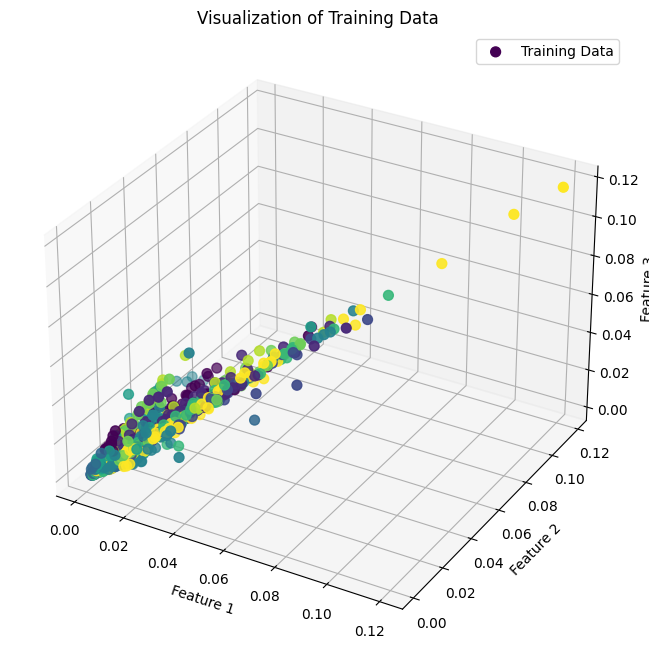

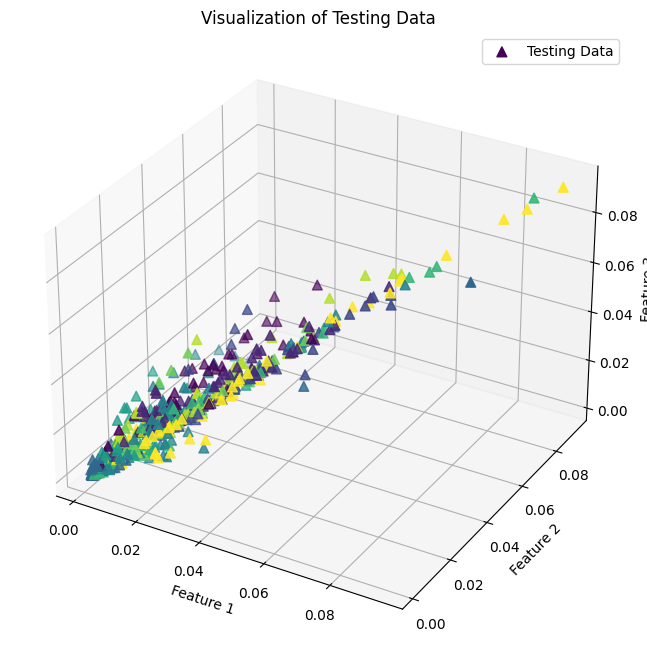

In [15]:
from mpl_toolkits.mplot3d import Axes3D

# Visualize training data in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_data[:, 0], train_data[:, 1], train_data[:, 2], c=train_labels, cmap='viridis', s=50, label='Training Data')
ax.set_title('Visualization of Training Data')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.legend()
plt.show()

# Visualize testing data in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_data[:, 0], test_data[:, 1], test_data[:, 2], c=test_labels, cmap='viridis', s=50, marker='^', label='Testing Data')
ax.set_title('Visualization of Testing Data')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.legend()
plt.show()


**Visualizing after PCA**

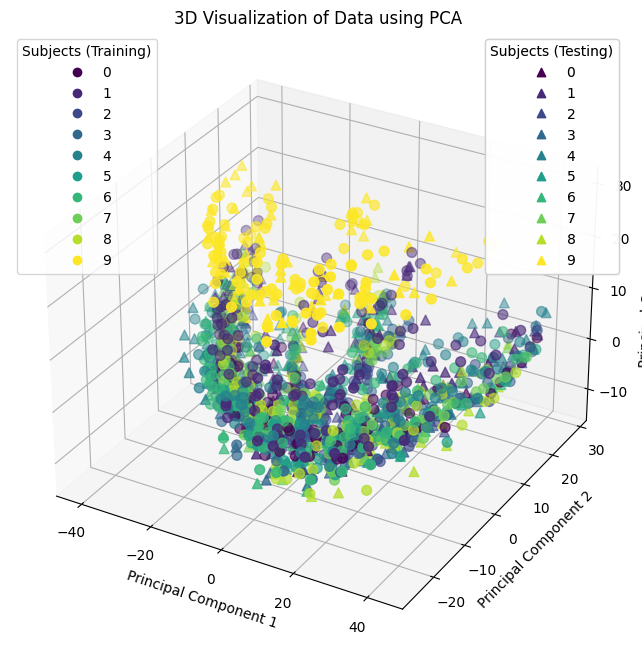

In [5]:
# Perform dimensionality reduction and visualization using PCA for training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data)  # Apply PCA transformation learned from training data to test data
X_train_pca = pca.transform(X_train_scaled)

# Perform dimensionality reduction and visualization using PCA for testing data
X_test_scaled = scaler.transform(test_data)  # Apply PCA transformation learned from training data to test data
X_test_pca = pca.transform(X_test_scaled)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot training data
scatter_train = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=train_labels, cmap='viridis', s=50, label='Training Data')

# Plot testing data
scatter_test = ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], X_test_pca[:, 2], c=test_labels, cmap='viridis', s=50, marker='^', label='Testing Data')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Visualization of Data using PCA')

legend_train = ax.legend(*scatter_train.legend_elements(), title='Subjects (Training)', loc='upper left')
legend_test = ax.legend(*scatter_test.legend_elements(), title='Subjects (Testing)', loc='upper right')
ax.add_artist(legend_train)
ax.add_artist(legend_test)

plt.show()


the **decision boundary** separates regions corresponding to different individuals' faces. Each region represents the area where the classifier predicts a specific individual's identity based on the input features

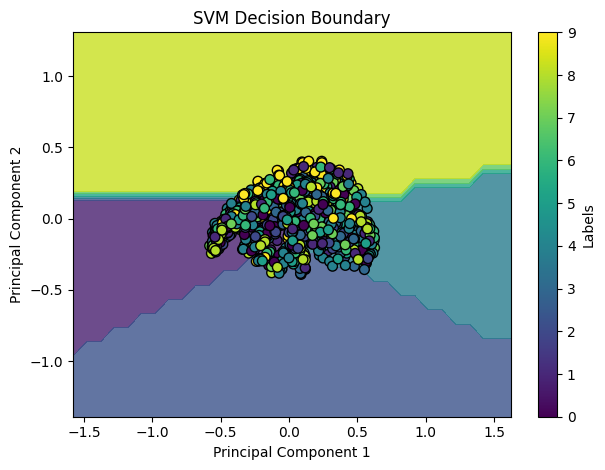

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


# Train SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_pca, y_train)

# Train GaussianNB classifier
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train_pca, y_train)

# Train k-NN classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_pca, y_train)

# Define a meshgrid to create a dense grid of points
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class labels for each point in the meshgrid
Z_svm = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z_svm = Z_svm.reshape(xx.shape)

Z_gnb = gnb_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z_gnb = Z_gnb.reshape(xx.shape)

Z_knn = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z_knn = Z_knn.reshape(xx.shape)

# Plot decision boundary and scatter plot of training data for SVM

plt.contourf(xx, yy, Z_svm, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', s=50, edgecolor='k')
plt.title('SVM Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Labels')



plt.tight_layout()
plt.show()


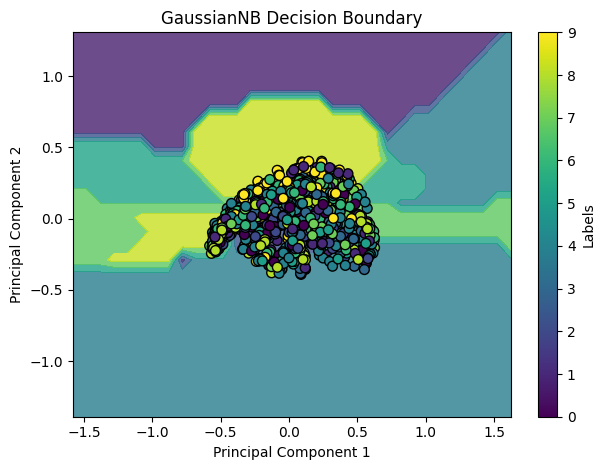

In [63]:
# Plot decision boundary and scatter plot of training data for GaussianNB

plt.contourf(xx, yy, Z_gnb, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', s=50, edgecolor='k')
plt.title('GaussianNB Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Labels')


plt.tight_layout()
plt.show()

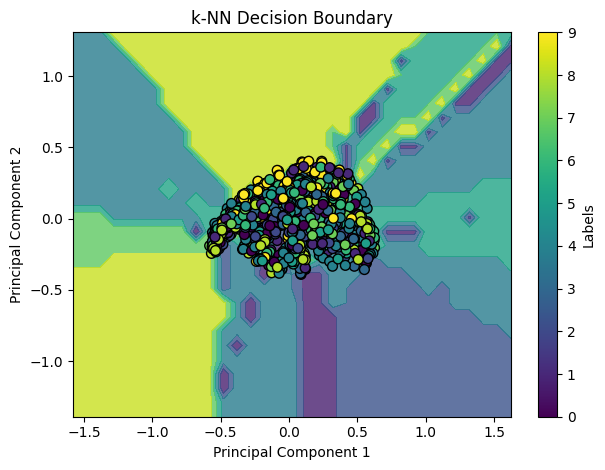

In [64]:
# Plot decision boundary and scatter plot of training data for k-NN

plt.contourf(xx, yy, Z_knn, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', s=50, edgecolor='k')
plt.title('k-NN Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Labels')

plt.tight_layout()
plt.show()